## Simple function

In [1]:
# Write a function 'findMaxIter' that takes a list and returns the largest element in the list, iteratively
# i.e. using for loop, while loop or list comprehension
# For error handling: if the size of list is smaller than 1, return -1
# TODO: Make the cell print 'True' for all cases

# Your code goes below here
def findMaxIter(l: list) -> int:
    if len(l) < 1: return -1
    temp = l[0]
    for i in l:
        if i > temp:
            temp = i
    return temp
            
    
# Do not modify below!
print(findMaxIter([]) == -1)
import random
l = [random.randint(0, 50) for i in range(100)]
print(findMaxIter(l) == max(l))

True
True


In [2]:
# Write the function 'getLarger' that returns the larger of the input int a and b
# If a and b are equal, return a
# You do not have to think about error handling here
# TODO: Make the cell print 'True' for all cases

# Your code goes below here
def getLarger(a: int, b: int) -> int:
    return a if a >= b else b

# Do not modify below:
print(getLarger(-3, 5) == 5)
print(getLarger(5, 5) == 5)

True
True


## Recursion practice

Now, using the 'getLarger' we have written above, let's write 'findMax' recursively.

To give some hints, the simple (or *base*) case would be when the length of list is 1, in which the largest element is the only element.

Otherwise, the function would return the **larger** of the first element of the list(i.e. `l[0]`) or the **maximum of the rest of the list(`l[1:]`)**.

And how do we find the **larger** between two elements? We have just written the function that does so!

In [3]:
# Write a function 'findMaxRecursive' that takes a list and returns the largest element in the list, recursively
# For error handling: if the size of list is smaller than 1, return -1
# TODO: Make the cell print 'True' for all cases

# Your code goes below here
def findMaxRecursive(l: list) -> int:
    if len(l) < 1: return -1
    if len(l) == 1: return l[0]
    return getLarger(l[0], findMaxRecursive(l[1:]))

# Do not modify below!
print(findMaxRecursive([]) == -1)
import random
l = [random.randint(0, 50) for i in range(100)]
print(findMaxRecursive(l) == max(l))

True
True


In [4]:
# Simply run this cell, and observe the runtime of the two functions

import sys
if sys.getrecursionlimit() < 3000: sys.setrecursionlimit(4000)

l = [random.randint(0, 50) for i in range(500)]
print("Runtime for iterative findMax")
%time findMaxIter(l)
print("\nRuntime for recursive findMax")
%time findMaxRecursive(l)

Runtime for iterative findMax
CPU times: user 23 µs, sys: 0 ns, total: 23 µs
Wall time: 26 µs

Runtime for recursive findMax
CPU times: user 2.05 ms, sys: 429 µs, total: 2.47 ms
Wall time: 2.51 ms


50

## So, why do we use it?

As you can see from the output of the above cell, recursion is generally slower than iteration. In fact, look at the plot shown below.

4.75 µs ± 164 ns per loop (mean ± std. dev. of 10 runs, 5 loops each)
75.4 µs ± 7.42 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
8.61 µs ± 299 ns per loop (mean ± std. dev. of 10 runs, 5 loops each)
169 µs ± 19.5 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
11.8 µs ± 177 ns per loop (mean ± std. dev. of 10 runs, 5 loops each)
287 µs ± 20.1 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
13.6 µs ± 190 ns per loop (mean ± std. dev. of 10 runs, 5 loops each)
491 µs ± 101 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
16.9 µs ± 193 ns per loop (mean ± std. dev. of 10 runs, 5 loops each)
495 µs ± 50 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
18.8 µs ± 536 ns per loop (mean ± std. dev. of 10 runs, 5 loops each)
695 µs ± 60.7 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
21.4 µs ± 337 ns per loop (mean ± std. dev. of 10 runs, 5 loops each)
909 µs ± 128 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
26.5 µs ± 1.57 µs per l

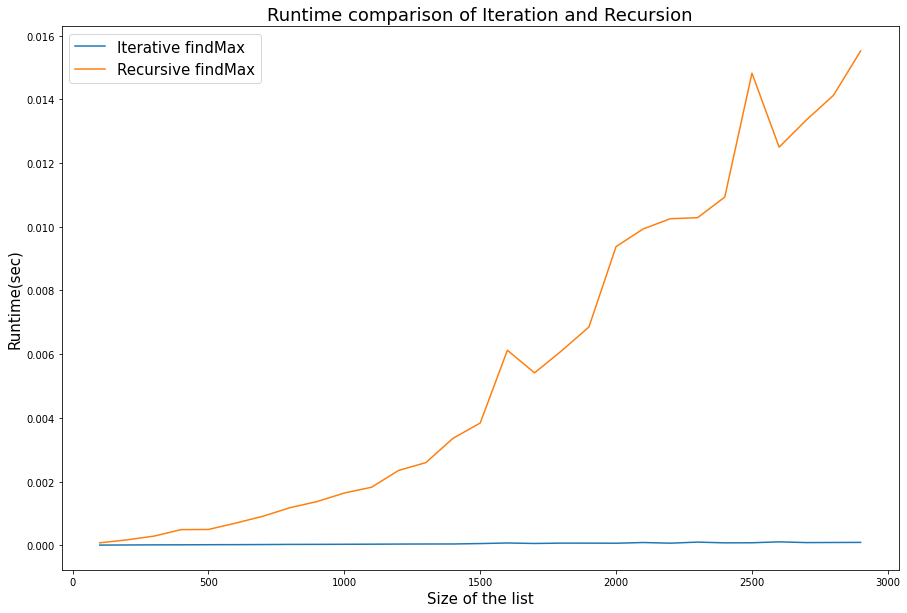

In [39]:
# Simply run this cell and observe the output plot.
# If this cell returns an error, please contact me!

iter_list = []
rec_list = []
size = []
for i in range(100, 3000, 100):
    size.append(i)
    l = [random.randint(0, i) for i in range(i)]
    temp = %timeit -n5 -r10 -o findMaxIter(l)
    iter_list.append(temp.average)
    temp = %timeit -n5 -r10 -o findMaxRecursive(l)
    rec_list.append(temp.average)

try:
    import matplotlib.pyplot as plt
except:
    try:
        ! pip install --user matplotlib
    except: 
        ! pip3 install --user matplotlib
        
plt.figure(figsize = (15,10))
plt.plot(size, iter_list, label = "Iterative findMax")
plt.plot(size, rec_list, label = "Recursive findMax")
plt.xlabel("Size of the list", fontsize = 15)
plt.ylabel("Runtime(sec)", fontsize = 15)
plt.title("Runtime comparison of Iteration and Recursion", fontsize = 18)
plt.legend(fontsize = 15)

You can see that the runtime of a recursive function grows exponentially, with the increase in size of the list. If so, why do we still use recursion?

The biggest reason is because it makes the code simpler, as discussed in last meeting. Let's look at the image below.

![Ackermann](Ackermann.png)

The picture above represents the [Ackermann function](https://en.wikipedia.org/wiki/Ackermann_function).

Let's try to write this using recursion.

In [33]:
# Write the 'Ackermann_recursive', based on the fuction description seen above.
# The function takes two input integers, m and n, and returns an int
# TODO: Make the cell print 'True' for all cases

# Your code goes below here
def Ackermann_recursive(m: int, n: int) -> int:
    if m == 0: return n + 1
    if m > 0 and n == 0: return Ackermann_recursive(m - 1, 1)
    return Ackermann_recursive(m - 1, Ackermann_recursive(m, n - 1))

# Do not modify below:
print(Ackermann_recursive(1, 2) == 4)
print(Ackermann_recursive(3, 2) == 29)

True
True


You can see that the Ackermann fuction can be written with recursion with just a few lines of code.
However, let's try writing this iteratively. 

As writing this iteratively is bit challenging, I have provided the code for you.

In [38]:
# Simply run this cell

def Ackermann_iterative(m: int, n: int) -> int:
    mList = []
    while(True):
        if m == 0: 
            n += 1
            if len(mList) == 0:
                return n
            else:
                index = len(mList) - 1
                m = mList[index]
                del mList[index]
        elif n == 0:
            m -= 1
            n = 1
        else:
            mList.append(m - 1)
            n -= 1

print(Ackermann_iterative(1, 2) == 4)
print(Ackermann_iterative(3, 2) == 29)

True
True


You can see that both `Ackermann_recursive` and `Ackermann_iterative` behaves the same. In fact, the [Church-Turing thesis](https://en.wikipedia.org/wiki/Church–Turing_thesis) proves that all iterative functions can be written recursively, and vice versa.

However, `Ackermann_iterative` is very hard to understand in a glance, and also it is longer than `Ackermann_recursive`.

Thus, we can see that recursion and iteration both possess pros and cons. Therefore, flexibly switching between recursion and iteration would be an important skill for a good programmer to possess.